## PyCaret provides support for:
- Classification (‘lr’, ‘knn’, ‘nb’, ’dt’, ‘svm’, ‘rbfsvm’, ‘gpc’, ‘mlp’, ‘ridge’, ‘rf’...‘xgboost’, ‘lightgbm’, ‘catboost’)
- Regression (‘lr’, ‘lasso’, ‘ridge’, ‘en’, ‘lar’, ‘llar’, ... ‘kr’, ‘svm’, ‘knn’, ‘dt’, ‘rf’, ‘et’, ‘ada’, ‘gbr’, ‘mlp’, ‘xgboost’, ‘lightgbm’, ‘catboost’)
- Clustering (‘kmeans’, ‘ap’, ‘meanshift’, 'sc’, ‘hclust’, ‘dbscan’, ‘optics’, ‘birch’, ‘kmodes’)
- Anomaly Detection (‘abod’, ‘iforest’, ‘cluster’, ‘cof’, ‘histogram’, ‘knn’, ‘lof’, ‘svm’, ‘pca’, ‘mcd’, ‘sod’, ‘sos‘)
- Natural Language Processing (‘lda’, ‘lsi’, ‘hdp’, ‘rp’, ‘nmf’)

#### Some features:
- Highly configurable, but default parameters are already great
- Extremely easy way to compare a large number of methods
- Easy to develop the whole experimental methodology of your paper (CV-Folds, Parameter optimization, Result Analysis, ...)
- GPU friendly


In [3]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
# initializing setup
from pycaret.classification import *
clf1 = setup(data, target = 'Class variable')

,Description,Value
0,session_id,4563
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7782,0.8265,0.5598,0.7183,0.6224,0.4700,0.4818,0.2260
ridge,Ridge Classifier,0.7745,0.0000,0.5431,0.7211,0.6123,0.4587,0.4727,0.0070
rf,Random Forest Classifier,0.7690,0.8191,0.5480,0.6841,0.6030,0.4451,0.4536,0.0430
lda,Linear Discriminant Analysis,0.7689,0.8211,0.5431,0.7053,0.6065,0.4478,0.4602,0.0050
gbc,Gradient Boosting Classifier,0.7654,0.8199,0.5895,0.6677,0.6199,0.4529,0.4592,0.0190
catboost,CatBoost Classifier,0.7635,0.8309,0.5827,0.6584,0.6119,0.4449,0.4505,0.7740
et,Extra Trees Classifier,0.7578,0.7960,0.4977,0.6840,0.5662,0.4076,0.4226,0.0380
knn,K Neighbors Classifier,0.7505,0.7593,0.5487,0.6439,0.5898,0.4130,0.4174,0.0900
ada,Ada Boost Classifier,0.7505,0.8043,0.5775,0.6356,0.6020,0.4219,0.4251,0.0170
lightgbm,Light Gradient Boosting Machine,0.7485,0.8137,0.5820,0.6329,0.6041,0.4208,0.4233,0.4450


In [7]:
# List the currently available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [8]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.7454,0.5000,0.6923,0.5806,0.4179,0.4288
1,0.8148,0.8812,0.6111,0.7857,0.6875,0.5588,0.5677
2,0.7963,0.8565,0.6111,0.7333,0.6667,0.5217,0.5262
3,0.7407,0.8287,0.4444,0.6667,0.5333,0.3636,0.3780
4,0.7778,0.8256,0.4444,0.8000,0.5714,0.4375,0.4719
5,0.8148,0.8441,0.5000,0.9000,0.6429,0.5312,0.5731
6,0.8333,0.8781,0.7222,0.7647,0.7429,0.6197,0.6203
7,0.7170,0.8023,0.5294,0.5625,0.5455,0.3402,0.3406
8,0.7736,0.7958,0.5882,0.6667,0.6250,0.4637,0.4656
9,0.7547,0.8072,0.6471,0.6111,0.6286,0.4457,0.4461


In [9]:
tuned_model = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7593,0.7546,0.5000,0.6923,0.5806,0.4179,0.4288
1,0.8148,0.8765,0.6111,0.7857,0.6875,0.5588,0.5677
2,0.7963,0.8580,0.6111,0.7333,0.6667,0.5217,0.5262
3,0.7407,0.8333,0.4444,0.6667,0.5333,0.3636,0.3780
4,0.7778,0.8194,0.4444,0.8000,0.5714,0.4375,0.4719
5,0.7778,0.8534,0.3889,0.8750,0.5385,0.4194,0.4792
6,0.8148,0.8503,0.6667,0.7500,0.7059,0.5714,0.5735
7,0.7358,0.8056,0.5882,0.5882,0.5882,0.3938,0.3938
8,0.7358,0.7680,0.5882,0.5882,0.5882,0.3938,0.3938
9,0.7736,0.8105,0.6471,0.6471,0.6471,0.4804,0.4804


In [13]:
# Options include:
# - optimize (metric you want to optimize, allows user created metric to be used)
# - fold strategy
# - n_iter (max number of tries for random, bayesian search)
# - custom_grid (in case you know what you want to optimize)
# - search_library: scikit-learn, scikit-optimize, tune-sklearn, optuna
# - search_algorithm: random grid search, grid search, bayesian, etc
# - early_stopping

tuned_model = tune_model(lr, n_iter=100, early_stopping=5, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7577,0.6667,0.5000,0.5714,0.3077,0.3162
1,0.8148,0.8750,0.7222,0.7222,0.7222,0.5833,0.5833
2,0.8148,0.8549,0.8333,0.6818,0.7500,0.6053,0.6130
3,0.7778,0.8364,0.7778,0.6364,0.7000,0.5263,0.5330
4,0.7037,0.8241,0.5556,0.5556,0.5556,0.3333,0.3333
5,0.7407,0.8441,0.6111,0.6111,0.6111,0.4167,0.4167
6,0.7407,0.8580,0.7222,0.5909,0.6500,0.4474,0.4531
7,0.7547,0.8105,0.7647,0.5909,0.6667,0.4776,0.4876
8,0.7358,0.7778,0.7059,0.5714,0.6316,0.4292,0.4351
9,0.7358,0.8105,0.8824,0.5556,0.6818,0.4752,0.5126


15 out-of-the-box plots:
   - 'auc' - Area Under the Curve
   - 'threshold' - Discrimination Threshold
   - 'pr' - Precision Recall Curve
   - 'confusion_matrix' - Confusion Matrix
   - 'error' - Class Prediction Error
   - 'class_report' - Classification Report
   - 'boundary' - Decision Boundary
   - 'rfe' - Recursive Feature Selection
   - 'learning' - Learning Curve
   - 'manifold' - Manifold Learning
   - 'calibration' - Calibration Curve
   - 'vc' - Validation Curve
   - 'dimension' - Dimension Learning
   - 'feature' - Feature Importance
   - 'feature_all' - Feature Importance (All)
   - 'parameter' - Model Hyperparameter
   - 'lift' - Lift Curve
   - 'gain' - Gain Chart
   - 'tree' - Decision Tree

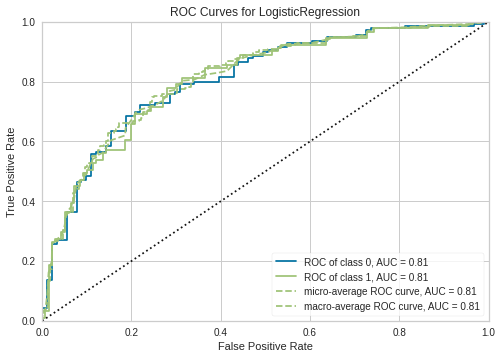

In [17]:
plot_model(tuned_model, plot="auc")

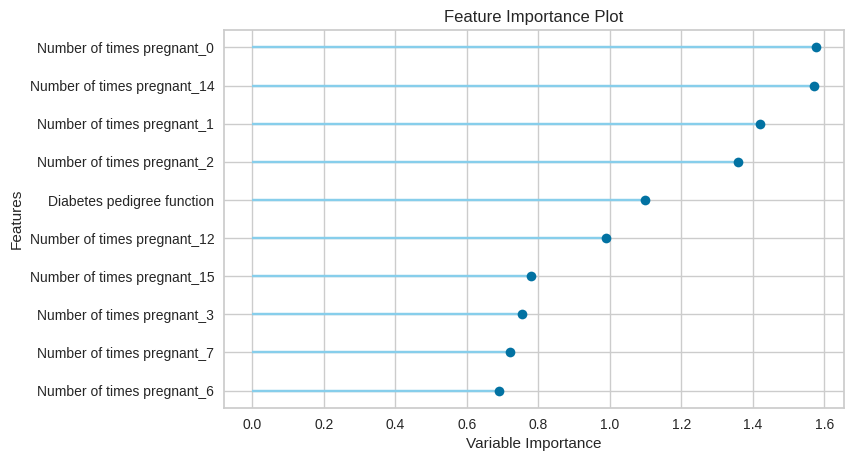

In [18]:
plot_model(tuned_model, plot="feature")

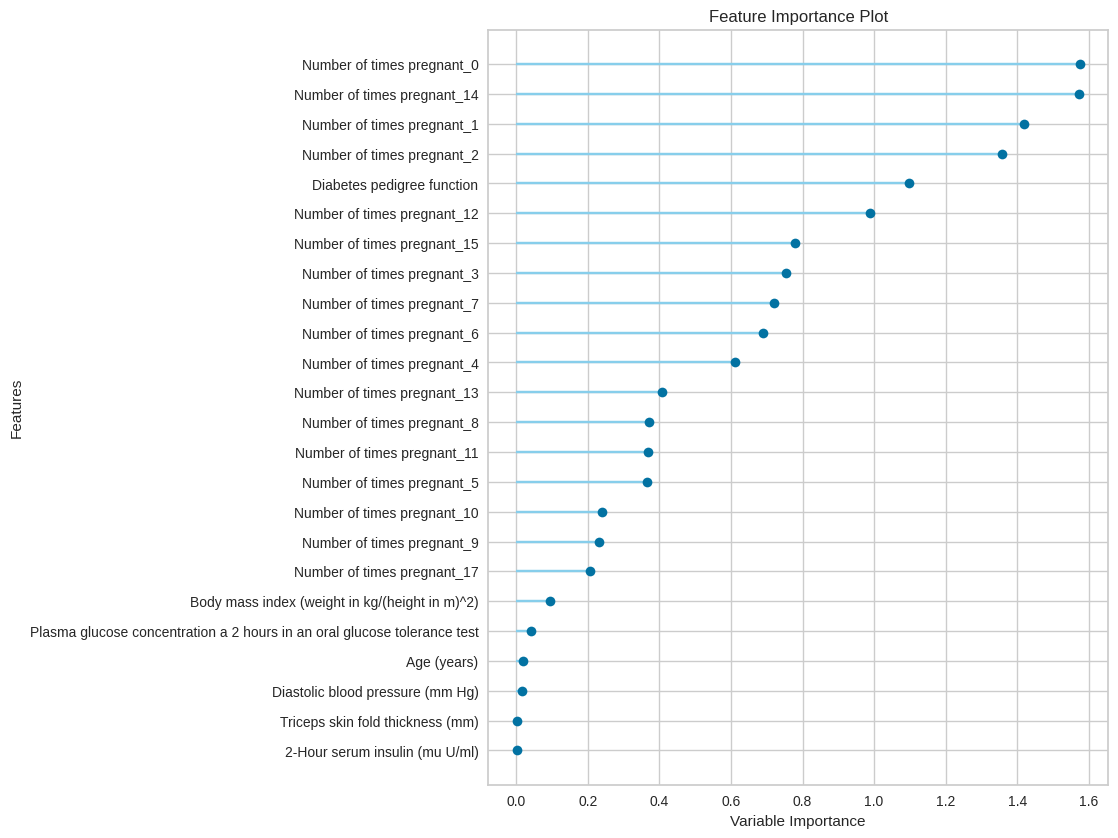

In [25]:
plot_model(tuned_model, plot="feature_all")

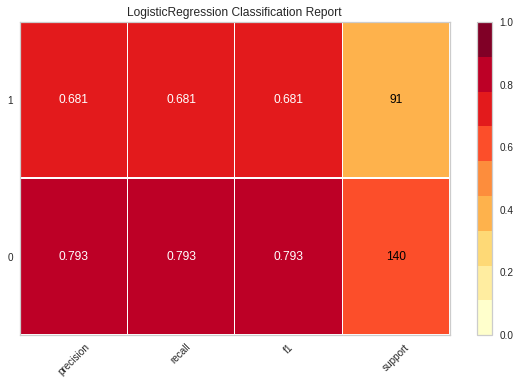

In [20]:
plot_model(tuned_model, plot="class_report")

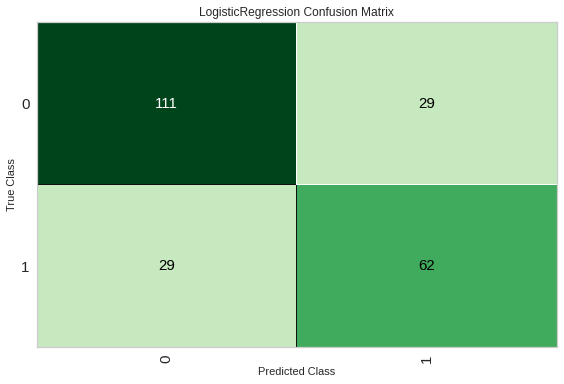

In [22]:
plot_model(tuned_model, plot="confusion_matrix")

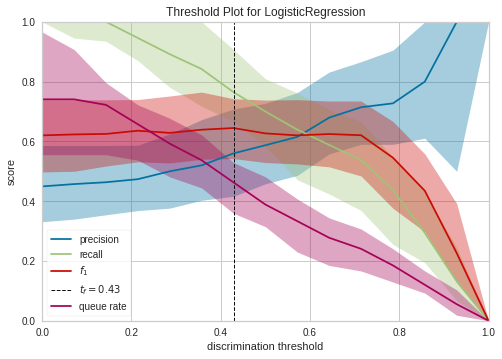

In [23]:
plot_model(tuned_model, plot="threshold")

In [29]:
# Or you can see all plots with 'evaluate_model'
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
# Predictions on the heldout dataset
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7489,0.8079,0.6813,0.6813,0.6813,0.4742,0.4742


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,108.0,44.0,20.0,130.0,24.000000,0.813,35.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.6469
1,176.0,90.0,34.0,300.0,33.700001,0.467,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9159
2,102.0,75.0,23.0,0.0,0.000000,0.572,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9922
3,111.0,60.0,0.0,0.0,26.200001,0.343,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8545
4,169.0,74.0,19.0,125.0,29.900000,0.268,31.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,102.0,86.0,36.0,120.0,45.500000,0.127,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.7663
227,125.0,80.0,0.0,0.0,32.299999,0.536,27.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5134
228,93.0,60.0,0.0,0.0,35.299999,0.263,25.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8718
229,125.0,86.0,0.0,0.0,37.599998,0.304,51.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.6221


Other features:
- SHAP values with interpret_model
- Possibility to stack/bag/ensemble models
- Any classifier that uses the same api as sklean can be used with pycaret
- Save/Load

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7407,0.7840,0.5000,0.6429,0.5625,0.3824,0.3884
1,0.8519,0.8850,0.6667,0.8571,0.7500,0.6471,0.6574
2,0.8704,0.8843,0.8333,0.7895,0.8108,0.7123,0.7129
3,0.7407,0.8009,0.4444,0.6667,0.5333,0.3636,0.3780
4,0.7222,0.7731,0.3889,0.6364,0.4828,0.3077,0.3251
5,0.7407,0.7932,0.3889,0.7000,0.5000,0.3438,0.3708
6,0.7778,0.8534,0.6111,0.6875,0.6471,0.4857,0.4875
7,0.7170,0.7696,0.4706,0.5714,0.5161,0.3188,0.3218
8,0.7547,0.8448,0.5294,0.6429,0.5806,0.4096,0.4135
9,0.7736,0.8023,0.6471,0.6471,0.6471,0.4804,0.4804


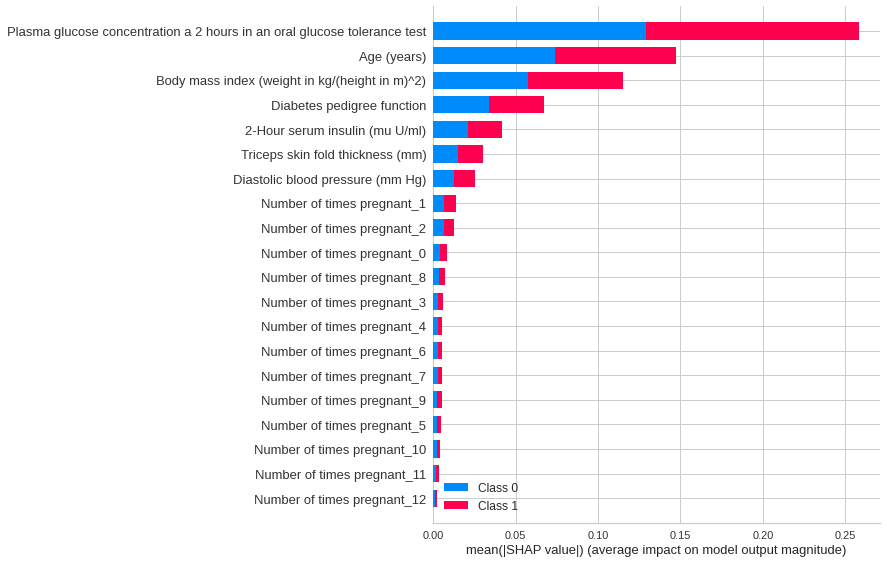

In [33]:
rf = create_model('rf')
interpret_model(rf) # SHAP Values

In [48]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.6944,0.6111,0.5789,0.5946,0.3836,0.3839
1,0.7407,0.7083,0.6111,0.6111,0.6111,0.4167,0.4167
2,0.7037,0.6528,0.5000,0.5625,0.5294,0.3143,0.3154
3,0.6296,0.5694,0.3889,0.4375,0.4118,0.1429,0.1434
4,0.7037,0.6389,0.4444,0.5714,0.5000,0.2941,0.2988
5,0.6481,0.5694,0.3333,0.4615,0.3871,0.1493,0.1531
6,0.7407,0.7361,0.7222,0.5909,0.6500,0.4474,0.4531
7,0.6981,0.6536,0.5294,0.5294,0.5294,0.3072,0.3072
8,0.6792,0.6242,0.4706,0.5000,0.4848,0.2523,0.2525
9,0.6792,0.6397,0.5294,0.5000,0.5143,0.2751,0.2754


In [52]:
ensemble_model(dt, n_estimators=20, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.6952,0.3889,0.5000,0.4375,0.2059,0.2092
1,0.7407,0.8426,0.3889,0.7000,0.5000,0.3438,0.3708
2,0.7593,0.7253,0.6111,0.6471,0.6286,0.4507,0.4511
3,0.8148,0.8218,0.5556,0.8333,0.6667,0.5455,0.5669
4,0.6481,0.7469,0.5000,0.4737,0.4865,0.2192,0.2194
5,0.7593,0.7562,0.5000,0.6923,0.5806,0.4179,0.4288
6,0.7037,0.7623,0.4118,0.5385,0.4667,0.2666,0.2712
7,0.7736,0.8113,0.5294,0.6923,0.6000,0.4460,0.4538
8,0.7358,0.8325,0.4706,0.6154,0.5333,0.3537,0.3598
9,0.6981,0.7500,0.3529,0.5455,0.4286,0.2360,0.2464


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=6371,


In [53]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

# blend individual models (ie., majority votting)
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7037,0.7485,0.3889,0.5833,0.4667,0.2727,0.2835
1,0.7593,0.7870,0.5556,0.6667,0.6061,0.4348,0.4385
2,0.6481,0.7778,0.4444,0.4706,0.4571,0.1972,0.1974
3,0.7593,0.7423,0.5556,0.6667,0.6061,0.4348,0.4385
4,0.6111,0.7130,0.5556,0.4348,0.4878,0.1818,0.1854
5,0.6852,0.7593,0.3889,0.5385,0.4516,0.2388,0.2450
6,0.7593,0.7409,0.6471,0.6111,0.6286,0.4507,0.4511
7,0.7736,0.7892,0.7059,0.6316,0.6667,0.4960,0.4978
8,0.7547,0.8235,0.5882,0.6250,0.6061,0.4282,0.4286
9,0.7358,0.8137,0.5882,0.5882,0.5882,0.3938,0.3938


In [55]:
# Using a meta learner
top3 = compare_models(n_select = 3)

xgboost = create_model('xgboost')
stack_soft2 = stack_models(top3, meta_model=xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6481,0.7253,0.2778,0.4545,0.3448,0.1231,0.1301
1,0.6852,0.8117,0.4444,0.5333,0.4848,0.2609,0.2631
2,0.7222,0.7299,0.5000,0.6000,0.5455,0.3478,0.3508
3,0.7407,0.7685,0.6111,0.6111,0.6111,0.4167,0.4167
4,0.7037,0.7176,0.6667,0.5455,0.6000,0.3684,0.3731
5,0.7963,0.7901,0.5556,0.7692,0.6452,0.5075,0.5207
6,0.6852,0.6932,0.4706,0.5000,0.4848,0.2585,0.2587
7,0.7358,0.8235,0.5294,0.6000,0.5625,0.3744,0.3759
8,0.7358,0.7892,0.5294,0.6000,0.5625,0.3744,0.3759
9,0.6981,0.7680,0.4706,0.5333,0.5000,0.2850,0.2861


In [57]:
# Using another external classifier
# Example Stanford's NGBoost: https://github.com/stanfordmlgroup/ngboost 
# NGB is not included on the default modules of pycaret
# NGBoost: a Natural Gradient Boosting for Probabilistic Prediction

from ngboost import NGBClassifier 
ngboost = NGBClassifier()
create_model(ngboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7577,0.4444,0.5333,0.4848,0.2609,0.2631
1,0.7593,0.8627,0.5000,0.6923,0.5806,0.4179,0.4288
2,0.7037,0.7778,0.5000,0.5625,0.5294,0.3143,0.3154
3,0.7593,0.8241,0.5000,0.6923,0.5806,0.4179,0.4288
4,0.6852,0.7616,0.6111,0.5238,0.5641,0.3200,0.3223
5,0.6852,0.7762,0.3889,0.5385,0.4516,0.2388,0.2450
6,0.7222,0.7520,0.5882,0.5556,0.5714,0.3662,0.3665
7,0.7547,0.7990,0.4706,0.6667,0.5517,0.3897,0.4009
8,0.7736,0.8268,0.7059,0.6316,0.6667,0.4960,0.4978
9,0.7736,0.8178,0.5294,0.6923,0.6000,0.4460,0.4538


NGBClassifier(Base=DecisionTreeRegressor(ccp_alpha=0.0,
                                         criterion='friedman_mse', max_depth=3,
                                         max_features=None, max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         presort='deprecated',
                                         random_state=None, splitter='best'),
              Dist=<class 'ngboost.distns.categorical.k_categorical.<locals>.Categorical'>,
              Score=<class 'ngboost.scores.LogScore'>, col_sample=1.0,
              learning_rate=0.01, minibatch_frac=1.0, n_estimators=500,
              natural_gradient=True,
              random_state=RandomState(MT1